In [21]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('../data/gaming.zip', 'r')
zip_ref.extractall('tmp/android_games')
zip_ref.close()


In [36]:
import tensorflow as tf

# Build the model - JUST RANDOM model 
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [37]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./10,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/10)

train_generator = train_datagen.flow_from_directory(
        'tmp/android_games/Game_Sub_Categorized_Android_Apps_Screenshots/train',  # This is the source directory for training images
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'tmp/android_games/Game_Sub_Categorized_Android_Apps_Screenshots/validation',  # This is the source directory for validation images
        target_size=(224, 224),  
        batch_size=64,
        class_mode='categorical')

Found 9004 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


In [39]:
# Constant for epochs
EPOCHS = 3

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/3
2/2 [==============================] - 3s 2s/step - loss: 3.4428 - accuracy: 0.0938 - val_loss: 3.1521 - val_accuracy: 0.1016
Epoch 2/3
2/2 [==============================] - 2s 1s/step - loss: 2.7593 - accuracy: 0.1094 - val_loss: 2.3817 - val_accuracy: 0.1250
Epoch 3/3
2/2 [==============================] - 2s 1s/step - loss: 2.3975 - accuracy: 0.0938 - val_loss: 2.3813 - val_accuracy: 0.1562


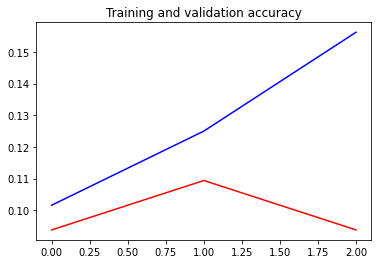

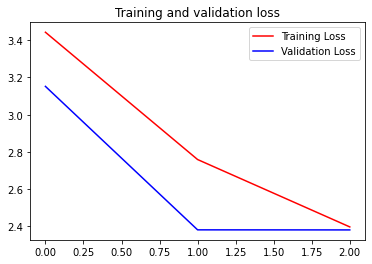

: 

In [40]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()